In [271]:
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()

Data PreProcessign object created successfully


In [273]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/AkankshaKaple/Machine_Learning_Algorithms/master/ML_Algorithms/Regression/Multi%20linear%20regression/airfoil_self_noise.dat.txt",sep='\t')

In [274]:
dataframe.head()

,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [275]:
dataframe.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'y']

In [276]:
dataframe.head()

,x1,x2,x3,x4,x5,y
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [277]:
dataframe.shape

(1502, 6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd23a1b320>,
      dtype=object)

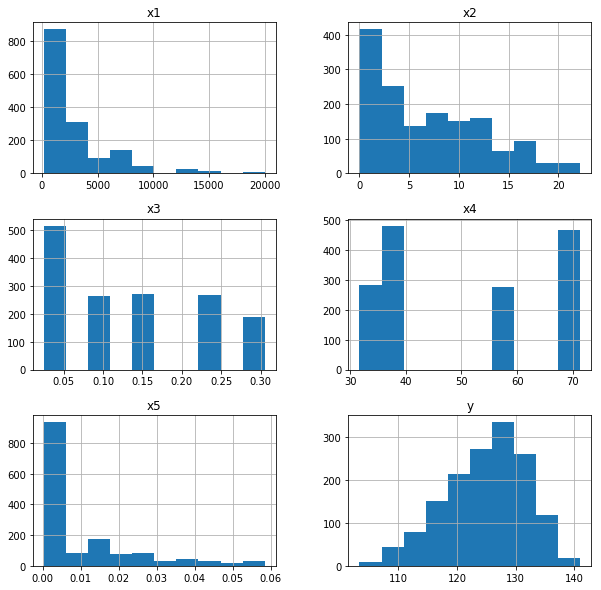

In [278]:
dataframe.hist(figsize=(10,10))

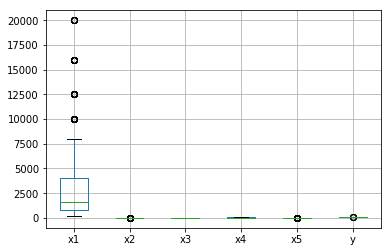

In [279]:
dataframe.boxplot()

In [280]:
dataframe = preprocess_obj.remove_outlier(dataframe)

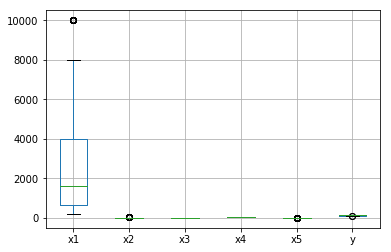

In [281]:
dataframe.boxplot()

In [282]:
dataframe.isna().sum()

x1    44
x2     0
x3     0
x4     0
x5    32
y      2
dtype: int64

In [283]:
dataframe = dataframe.dropna()
dataframe = dataframe.reset_index(drop=True)

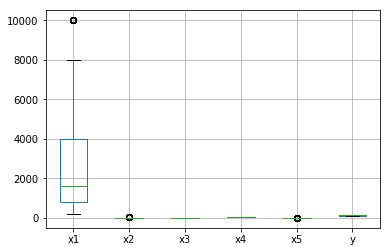

In [284]:
dataframe.boxplot()

In [285]:
dataframe.isnull().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
y     0
dtype: int64

In [286]:
dataframe,test_data = preprocess_obj.split(dataframe,500)

In [287]:
dataframe.shape

(926, 6)

In [287]:
Y = dataframe['y']

KeyboardInterrupt: 

In [ ]:
for item in dataframe:
    dataframe[item]  = preprocess_obj.feature_scaling(dataframe,item)

In [ ]:
dataframe['y']=Y

In [ ]:
try:
    dataframe = dataframe.drop('index',axis=1).reset_index()
except Exception as e:
    pass

In [ ]:
try:
    test_data = test_data.drop('index',axis=1).reset_index()
except Exception as e:
    pass

In [ ]:
class Scothastic_Gradient:
    def __init__(self):
        self.learning_rate = 0.1
        self.iteration = 1000
    def train(self,dataframe):
        dataframe.insert(loc=0, column='dummy', value=pd.Series(np.ones(dataframe.shape[0])))
        dataframe, Y = preprocess_obj.separate(dataframe,'y')
        weights = np.full((1,dataframe.shape[1]),1.2)
        print("weights:\n",weights.shape,"X head :\n",dataframe.head())
        for iterations in range(0,self.iteration):
            for counter in range(0,dataframe.shape[0]):
                X = dataframe.loc[counter,:]
                X = np.array(X).reshape(1,dataframe.shape[1])
                y = Y[counter]
                Ypred = np.matmul(weights,X.T)
                diff = np.array(Ypred-y).reshape(1,1)
                cost = (np.power(diff,2))/2
                if(diff==np.nan or diff == -1*np.inf or cost == np.nan or cost == np.inf): 
                    print("pred {},\n Y orig {},\nweights: {},\nX: {},\ncounter {}".format(Ypred,y,weights,X,counter))
                dw = np.matmul(abs(diff),X)
                weights = np.subtract(weights,np.multiply(dw,self.learning_rate))
            if iterations%50==0:
                print(cost)
        return weights
    
    def test(self,test_data,weights):
        test_data.insert(loc=0, column='dummy', value=pd.Series(np.ones(test_data.shape[0])))
        test_data,Y =preprocess_obj.separate(test_data,'y')
        Y = np.array(Y).reshape(Y.shape[0],1)
        Ypred = np.matmul(weights,test_data.T)
        error = np.sum(abs(np.subtract(Ypred,Y)))/Ypred.shape[0]
        print ((1-error)*100)
        

In [ ]:
grad = Scothastic_Gradient()

In [ ]:
weights = grad.train(dataframe)

In [ ]:
weights

In [ ]:
grad.test(test_data,weights)

In [ ]:
# dataframe.insert(loc=0, column='dummy', value=pd.Series(np.ones(dataframe.shape[0])))

In [ ]:
# dataframe.head()

In [ ]:
-1.3408072e+154 - 0.2596129478203458